# MVE441 Project 2 (Task 1, 2, 3 and half 4)

## Question 1 - Cluster exploration

### Load Data

In [2]:
library(tibble)

data <- tibble::as_tibble(read.csv("TCGA-PANCAN-HiSeq-801x20531//data.csv", 
                           header = TRUE, 
                           row.names = 1))

labels <- tibble::as_tibble(read.csv("TCGA-PANCAN-HiSeq-801x20531//labels.csv", 
                            header = TRUE))
#dim(data)
# dim(labels)

### Task 1

* Are there missing values? Look on the website of the data to see how missing values are coded.

    _There doesn't appear to be any information on how missing values are coded. Generally for gene expression data, a "0" means that no expression was detected._
    
* Compute the means and variances of the features (visualise in a histogram or with a kernel density estimate). Do they vary widely?

* Are there constant features?

    _Since there are feuters zero or close to zero variance there are constant or near constant features_

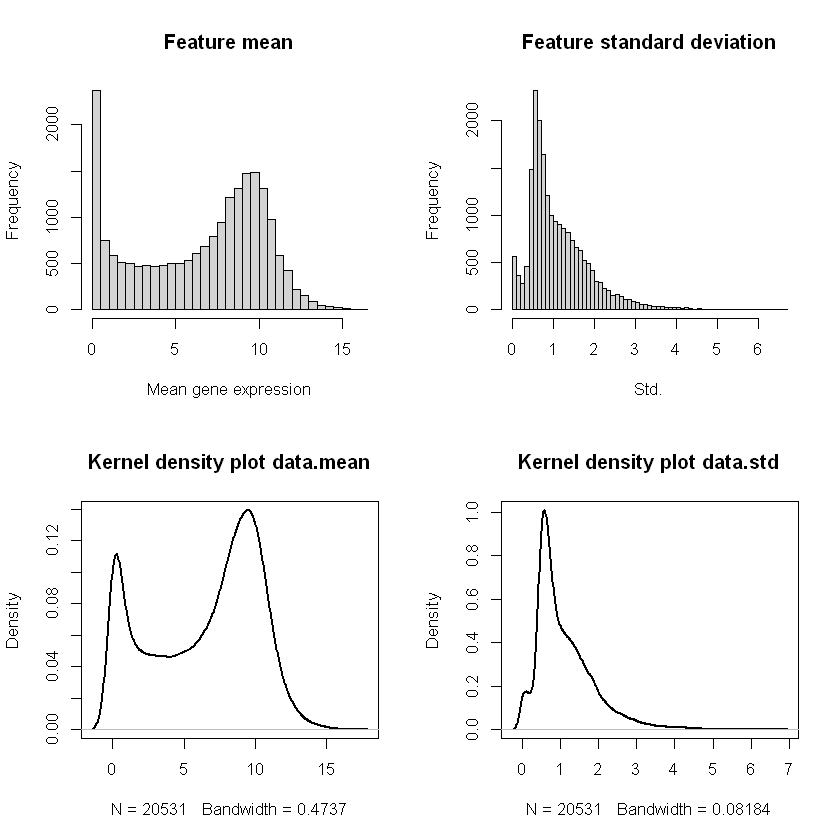

In [3]:
# Calculate the feature means and sort by decreasing value
data.mean <- apply(data, 2, mean)
data.mean.sort <- sort.list(data.mean, decreasing = TRUE)

# Calculate standrad deviation of the features and sort by decreasing value
data.std <- apply(data,2,sd)
data.std.sort <- sort.list(data.std, decreasing = TRUE)

par(mfrow=c(2,2))
# Histograms of feature means and standard deviations
hist(data.mean, 50,
     main = 'Feature mean', 
     xlab = 'Mean gene expression')

hist(data.std, 50, 
     main = 'Feature standard deviation',
     xlab = 'Std.')

# Kernel density plots of feature means and standard deviations
plot(density(data.mean), lwd = 2, main = "Kernel density plot data.mean")
plot(density(data.std), lwd = 2, main = "Kernel density plot data.std")

### Task 2 

* Perform variance filtering and reduce the number of features to about 5000.
* Check the means and variances for each feature again. Is there a need to center and standardize the data?

    _Centering and standardization could be relevant, however, it can mask things in some analyses so be carefull. Try both with and without._

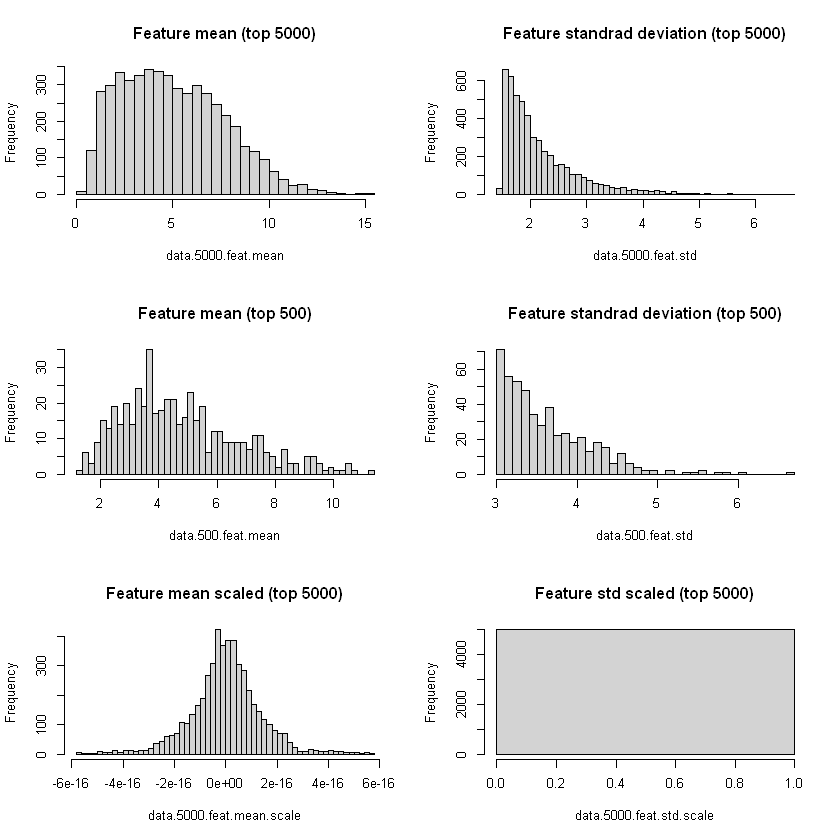

In [4]:
data <- as.data.frame(data)

# Filter out the 5000 features with highest variance
data.5000.feat <- data[data.std.sort[1:5000]]

# Calculate mean and standrad deviation of the features
data.5000.feat.mean <- apply(data.5000.feat, 2, mean)
data.5000.feat.std <- apply(data.5000.feat, 2, sd)

# Plot histograms of mean and standrad deviation
par(mfrow=c(3,2))
hist(data.5000.feat.mean, 50, main = 'Feature mean (top 5000)')
hist(data.5000.feat.std, 50, main = 'Feature standrad deviation (top 5000)')

# Filter out the 500 features with highest variance
data.500.feat <- data[data.std.sort[1:500]]

# Calculate mean and standrad deviation of the features top 500
data.500.feat.mean <- apply(data.500.feat, 2, mean)
data.500.feat.std <- apply(data.500.feat, 2, sd)

# Plot histograms of mean and standrad deviation top 500
hist(data.500.feat.mean, 50, main = 'Feature mean (top 500)')
hist(data.500.feat.std, 50, main = 'Feature standrad deviation (top 500)')

# Center and standradize (columnwise)
data.5000.feat.scale <- scale(data.5000.feat)
data.5000.feat.mean.scale <- apply(data.5000.feat.scale, 2, mean)
data.5000.feat.std.scale <- apply(data.5000.feat.scale, 2, sd)
hist(data.5000.feat.mean.scale, 50, main = 'Feature mean scaled (top 5000)')
hist(data.5000.feat.std.scale, 50, main = 'Feature std scaled (top 5000)')

### Task 3

* Perform a Principal Component Analysis on the reduced dataset and look at some pair-plots between the first few principal components.
* Are any patterns visible?

    _Plotting the first 4 principle components pairwise show 3 to 4 clusters_

* Also look at the eigenvalues of the principal components (scree plot). Is there a potential to reduce the dimension of the dataset even more? If so, perform a dimension reduction and only work with the selected principal components. If not, work with the original dataset after variance filtering.

    _The first 10 principle components cover just over 50 % of the total variance_

In [5]:
# Install and load packages
# install.packages("FactoMineR")
# install.packages("factoextra")
library("FactoMineR")
library("factoextra")

Warning message:
"package 'FactoMineR' was built under R version 4.1.3"
Warning message:
"package 'factoextra' was built under R version 4.1.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.2"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [6]:
# Principal component analysis
# Use scaled data
data.5000.pca <- PCA(data.5000.feat.scale,  ncp = 10)
# data.5000.pca <- PCA(data.5000.feat,  ncp = 10)

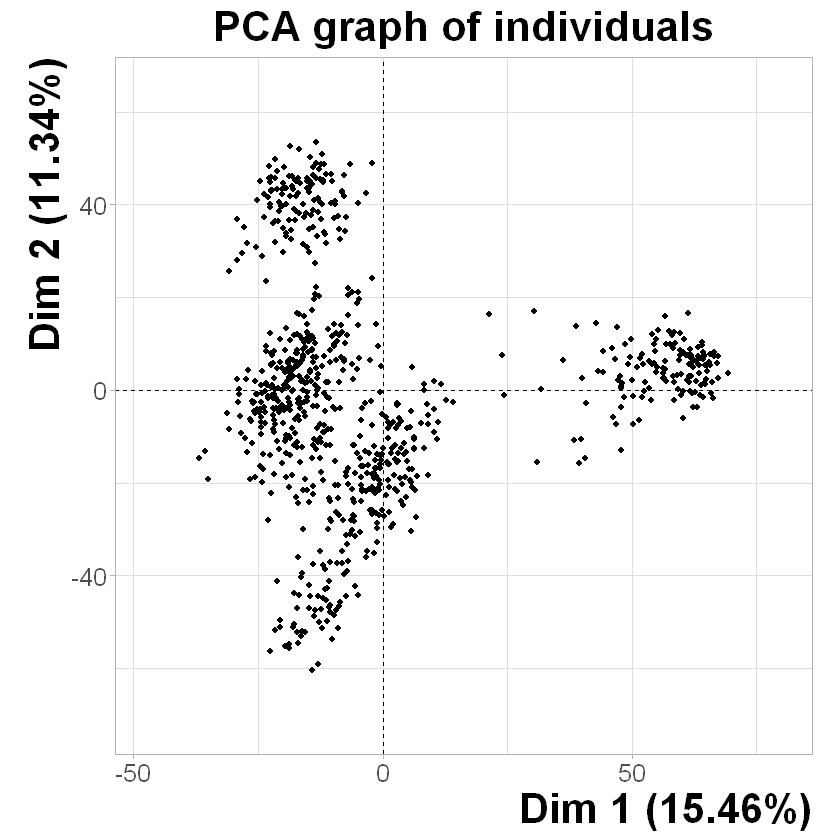

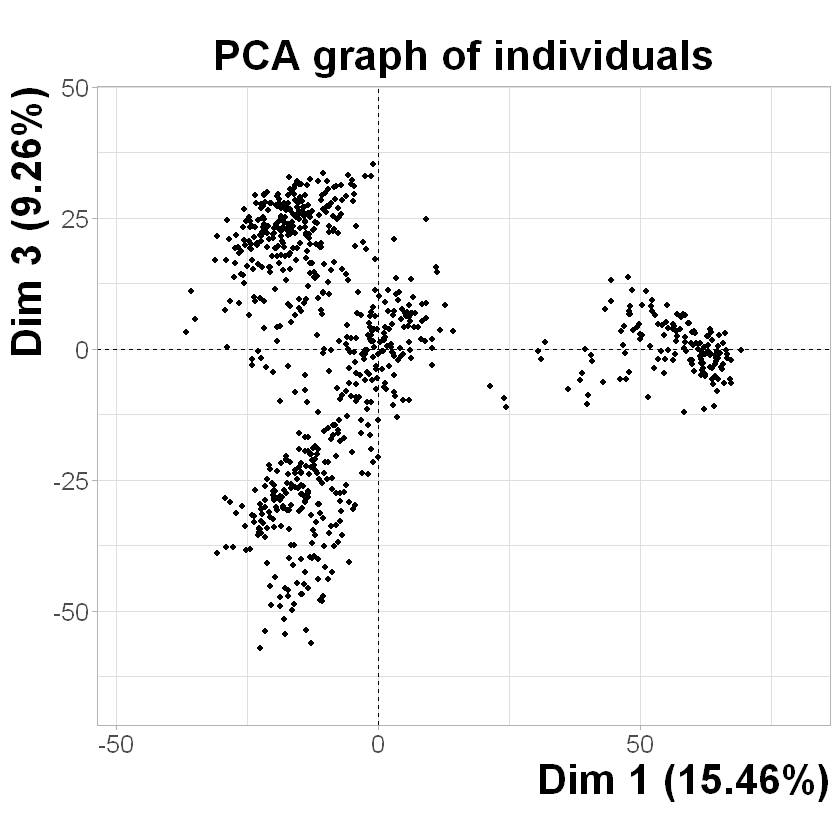

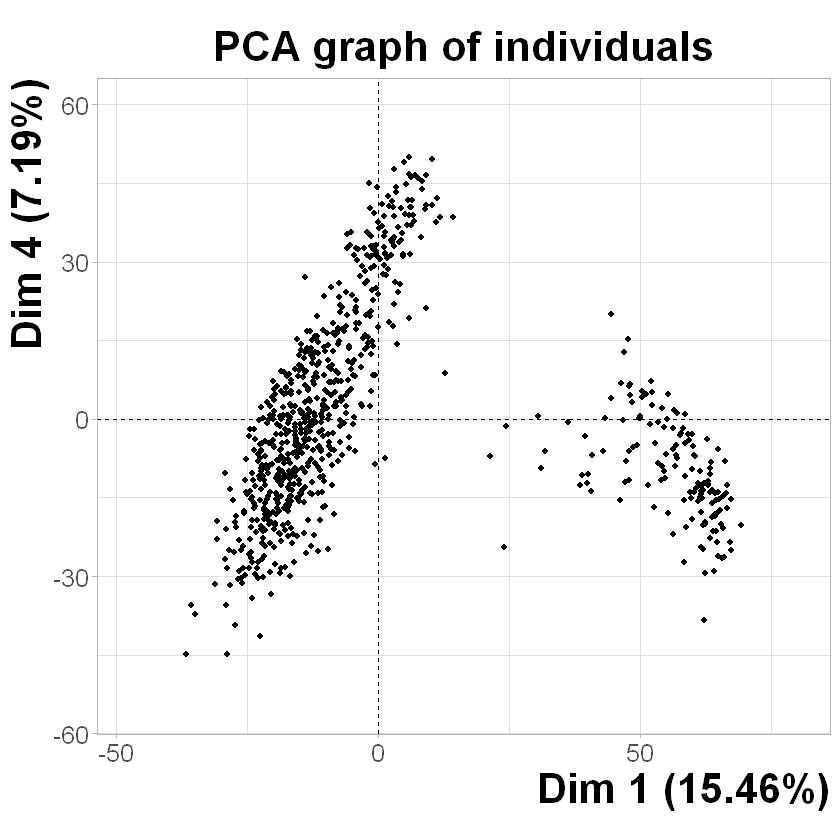

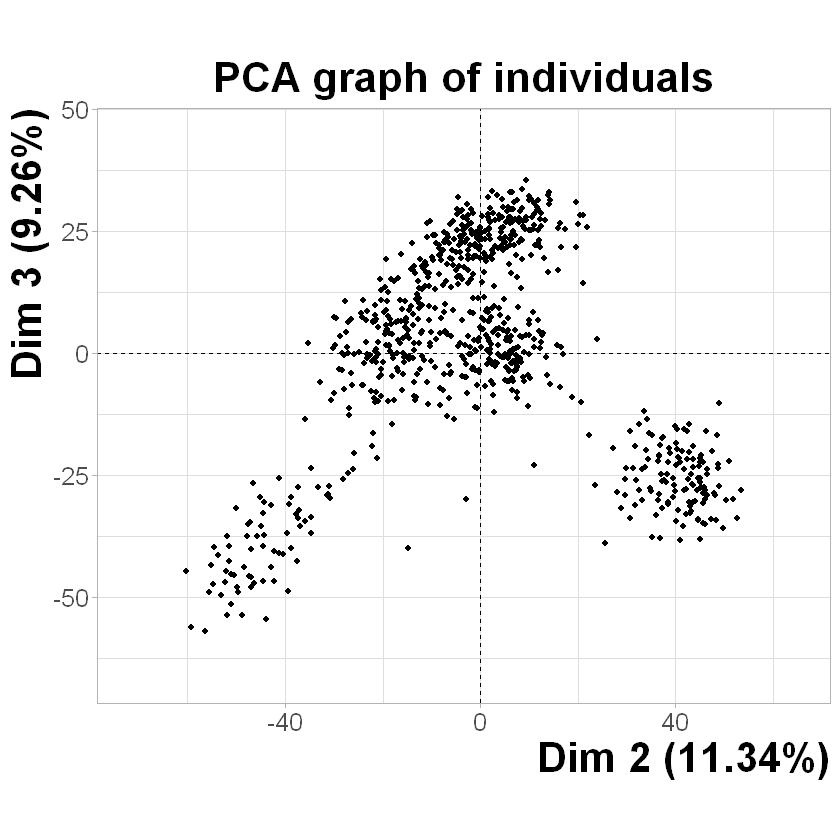

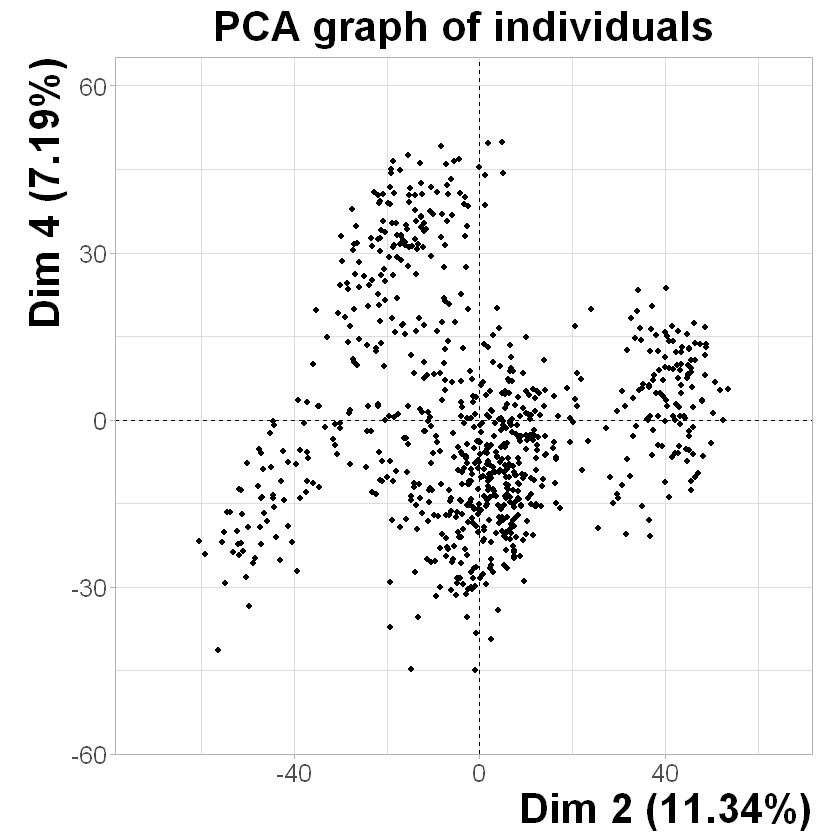

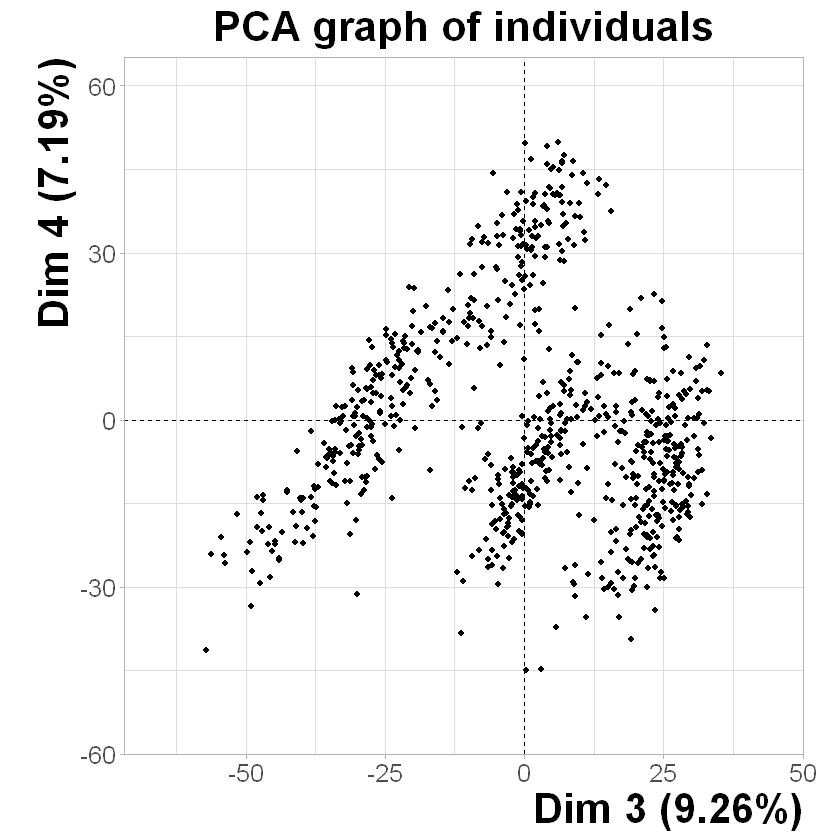

In [7]:
# Plot 2D plots of first few PC

plot(data.5000.pca, 
     label = 'none', 
     axes = c(1, 2))+
     theme(axis.text = element_text(size = 15),
           axis.title = element_text(size = 25),
           plot.title = element_text(size = 25, 
                                     face = "bold"))+
     theme(aspect.ratio=1)

plot(data.5000.pca, label = 'none', axes = c(1, 3))+
     theme(axis.text = element_text(size = 15),
           axis.title = element_text(size = 25),
           plot.title = element_text(size = 25, 
                                     face = "bold"))

plot(data.5000.pca, label = 'none', axes = c(1, 4))+
     theme(axis.text = element_text(size = 15),
           axis.title = element_text(size = 25),
           plot.title = element_text(size = 25, 
                                     face = "bold"))

plot(data.5000.pca, label = 'none', axes = c(2, 3))+
     theme(axis.text = element_text(size = 15),
           axis.title = element_text(size = 25),
           plot.title = element_text(size = 25, 
                                     face = "bold"))

plot(data.5000.pca, label = 'none', axes = c(2, 4))+
     theme(axis.text = element_text(size = 15),
           axis.title = element_text(size = 25),
           plot.title = element_text(size = 25, 
                                     face = "bold"))+
     theme(aspect.ratio=1)

plot(data.5000.pca, label = 'none', axes = c(3, 4))+
     theme(axis.text = element_text(size = 15),
           axis.title = element_text(size = 25),
           plot.title = element_text(size = 25, 
                                     face = "bold"))

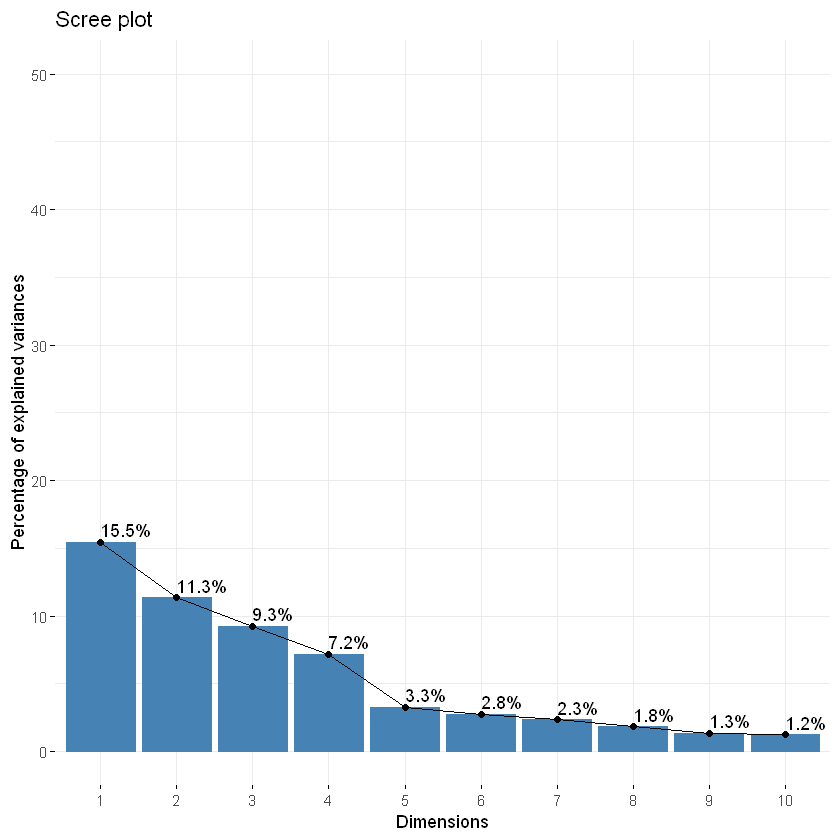

In [8]:
# Scree plot
fviz_eig(data.5000.pca, addlabels = TRUE, ylim = c(0,50))
# data.5000.pca$eig

### Task 4

* Use at least two different clustering algorithms to cluster the data for a range of different cluster counts
 Start with 2 and judge from the PCA pair plots what could be a good upper bound, then go at least 2 or 3 clusters further.
Caution Remember that some algorithms, such as k-means or GMM can have varying results depending on how they are initialised, so it is a good idea to re-run these algorithms a few times and to average over the outcome (see next bullet point).
* Use internal clustering indices to measure how coherent the clustering was for each choice of cluster count. Use at least three different indices.
 Look at plots of the clustering indices. Is there a clear indication what a good cluster count could be? Discuss and argue based on your results!
There may not be a clear answer, it is possible that two or more cluster counts are good potential choices.
* Visualise your clustering result, e.g. look at scatter plots of pairs of principal components and use the found cluster labels to color the data points.
Do the found clusters look reasonable? If not, you might want to reconsider your choice of clusters.
* Now use the true labels.
Did you find the same number of clusters as there are true classes?
How well do the clusters overlap with the classes? Discuss how this may differ between the methods you used.

In [9]:
#install.packages("fpc")
#install.packages("irlba")
library(NbClust)
library(mclust)
library(fpc)
#library(irlba)

Warning message:
"package 'mclust' was built under R version 4.1.3"
Package 'mclust' version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.

Warning message:
"package 'fpc' was built under R version 4.1.3"


#### K-means clustering

In [9]:
res.kmeans.db <- NbClust(data.5000.feat.scale, 
                         distance = "euclidean", 
                         min.nc=2, 
                         max.nc=8, 
                         method = "kmeans",
                         index = "db") 
print(res.kmeans.db$All.index)
print(res.kmeans.db$Best.nc)

     2      3      4      5      6      7      8 
1.7308 2.3658 2.0589 1.8649 2.2958 2.3152 2.5049 
Number_clusters     Value_Index 
         2.0000          1.7308 


In [10]:
res.kmeans.silhouette <- NbClust(data.5000.feat, 
                         distance = "euclidean", 
                         min.nc=2, 
                         max.nc=8, 
                         method = "kmeans",
                         index = "silhouette") 
print(res.kmeans.db$All.index)
print(res.kmeans.db$Best.nc)

     2      3      4      5      6      7      8 
1.7308 2.3658 2.0589 1.8649 2.2958 2.3152 2.5049 
Number_clusters     Value_Index 
         2.0000          1.7308 


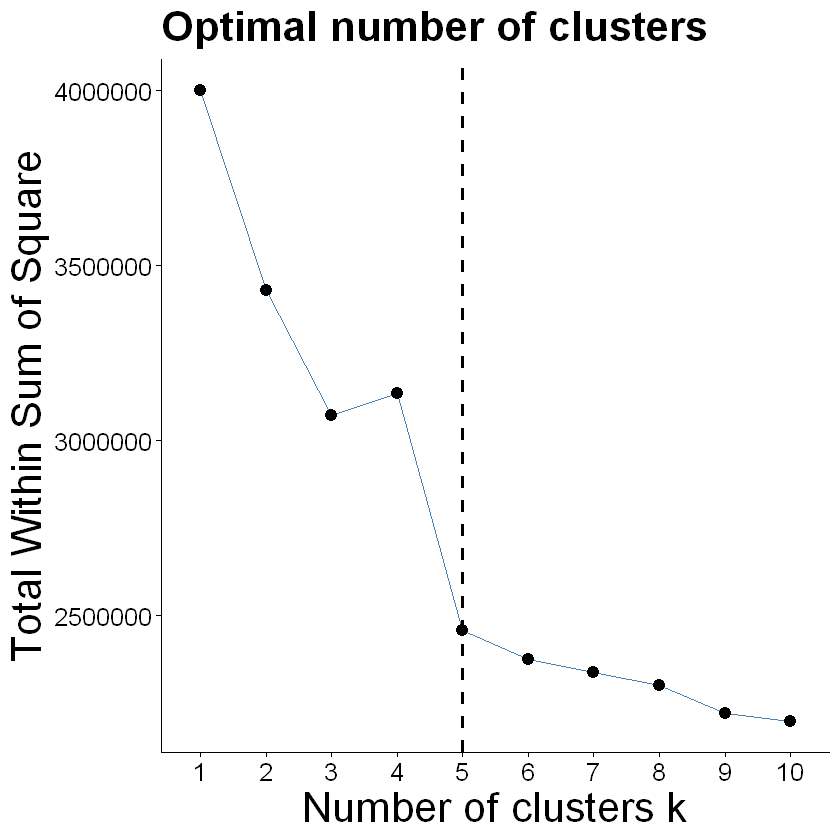

In [44]:
fviz_nbclust(data.5000.feat.scale, 
             kmeans, 
             method = "wss", 
             k.max = 10, 
             nboot = 1,
             print.summary = TRUE) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 25),
    plot.title = element_text(size = 25, face = "bold"))+
geom_point(size = 3)+
geom_vline(xintercept = 5, linetype = 2, size = 1)

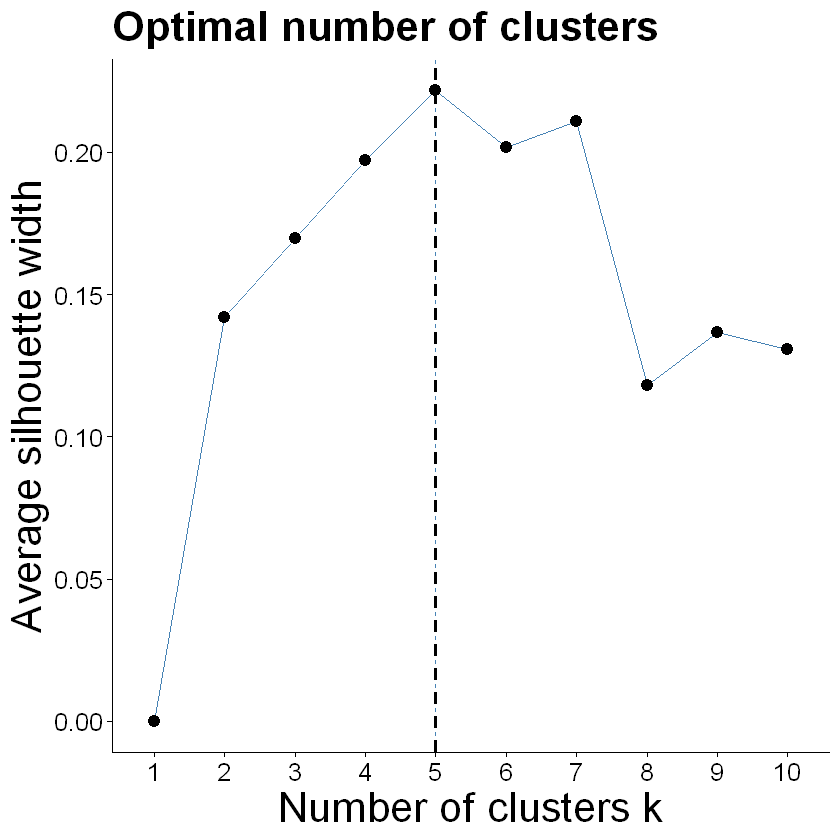

In [16]:
fviz_nbclust(data.5000.feat.scale, 
             kmeans, 
             method = "silhouette", 
             k.max = 10, 
             nboot = 1,
             print.summary = TRUE)+
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 25),
    plot.title = element_text(size = 25, face = "bold"))+
geom_point(size = 3)+
geom_vline(xintercept = 5, linetype = 2, size = 1)

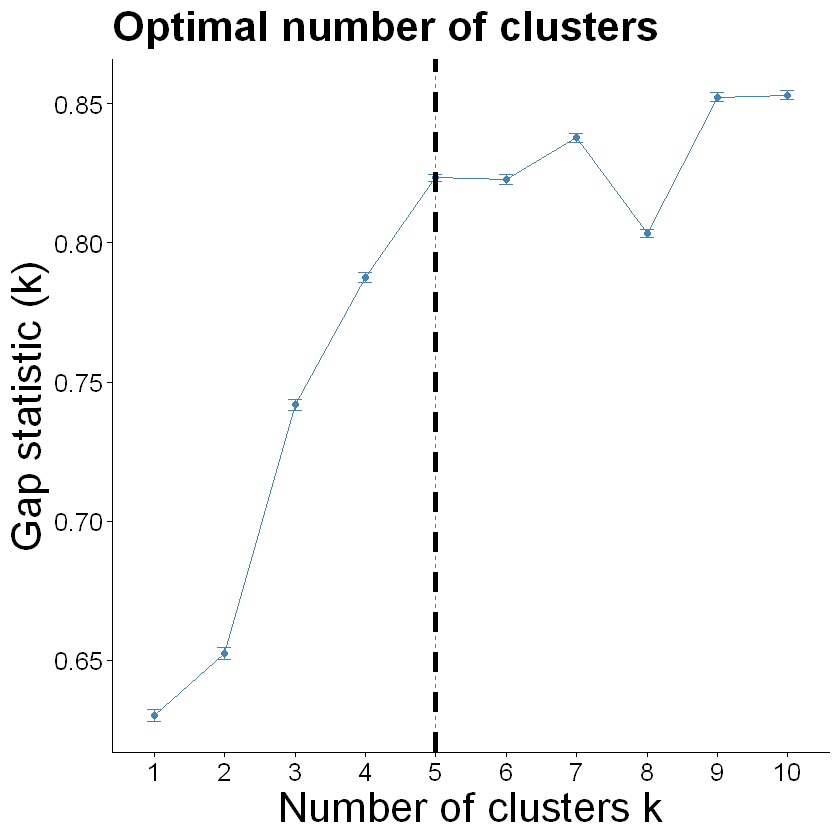

In [8]:
fviz_nbclust(data.5000.feat.scale, 
             kmeans, 
             method = "gap_stat", 
             k.max = 10, 
             nboot = 25,
             print.summary = TRUE) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 25),
    plot.title = element_text(size = 25, face = "bold"))+
geom_vline(xintercept = 5, linetype = 2, size = 1.5)

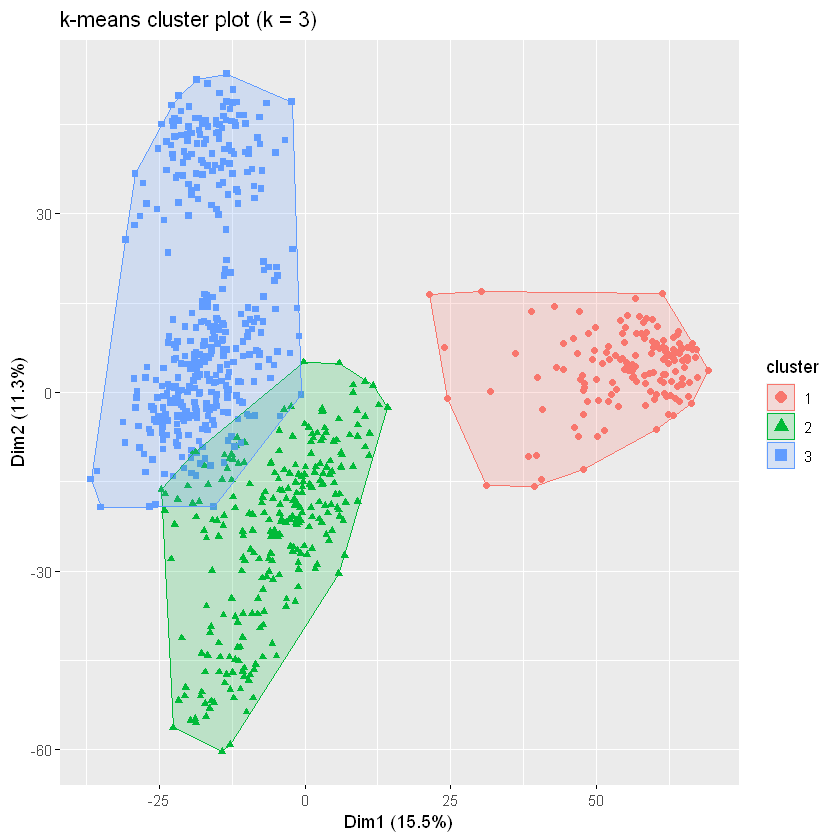

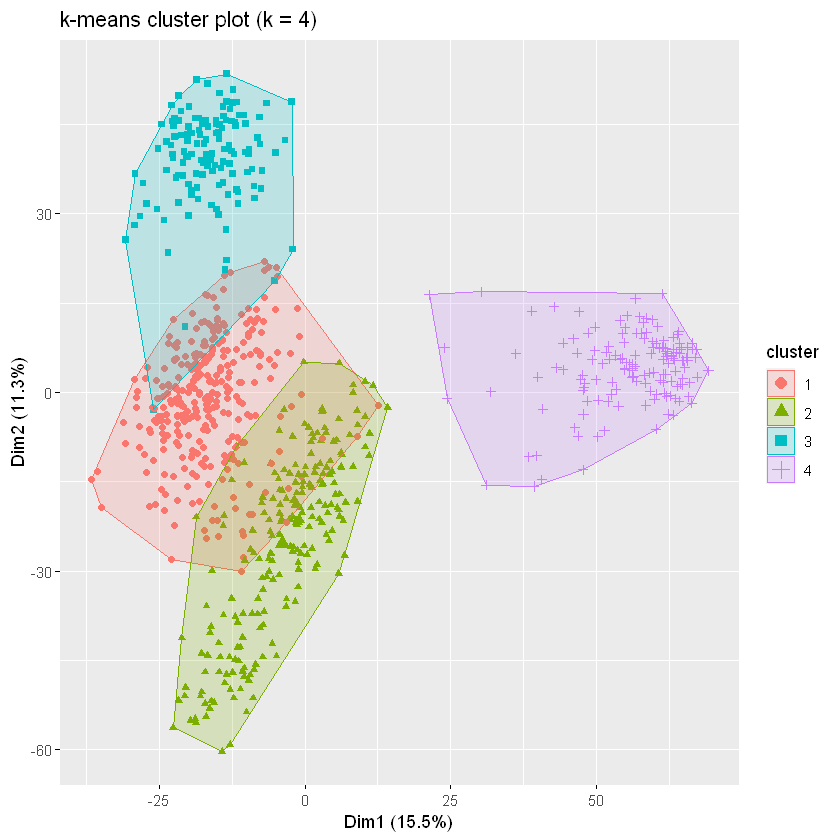

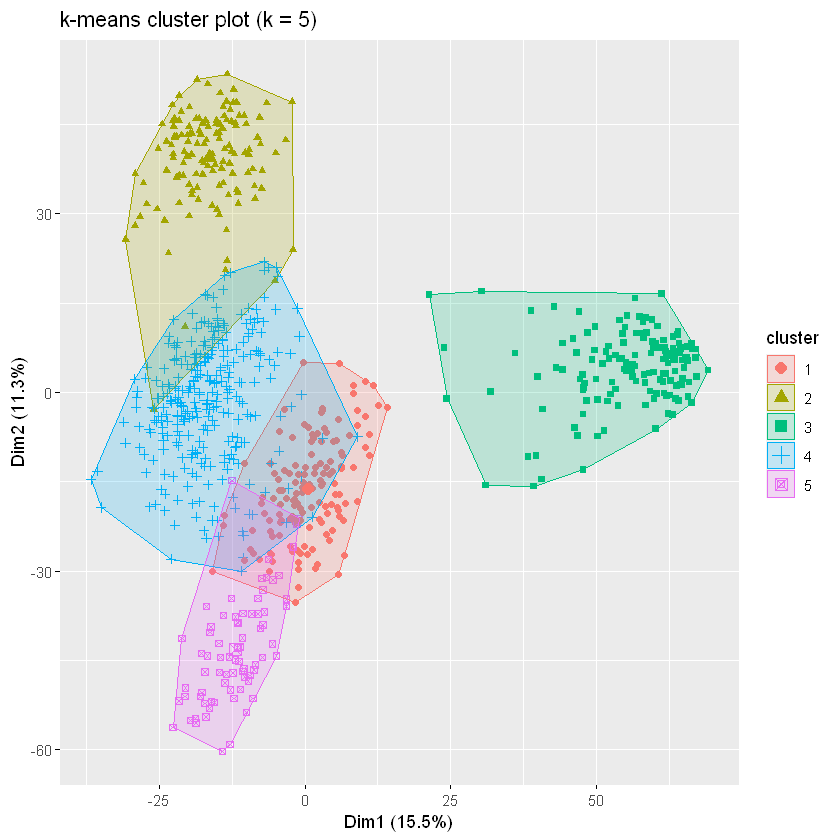

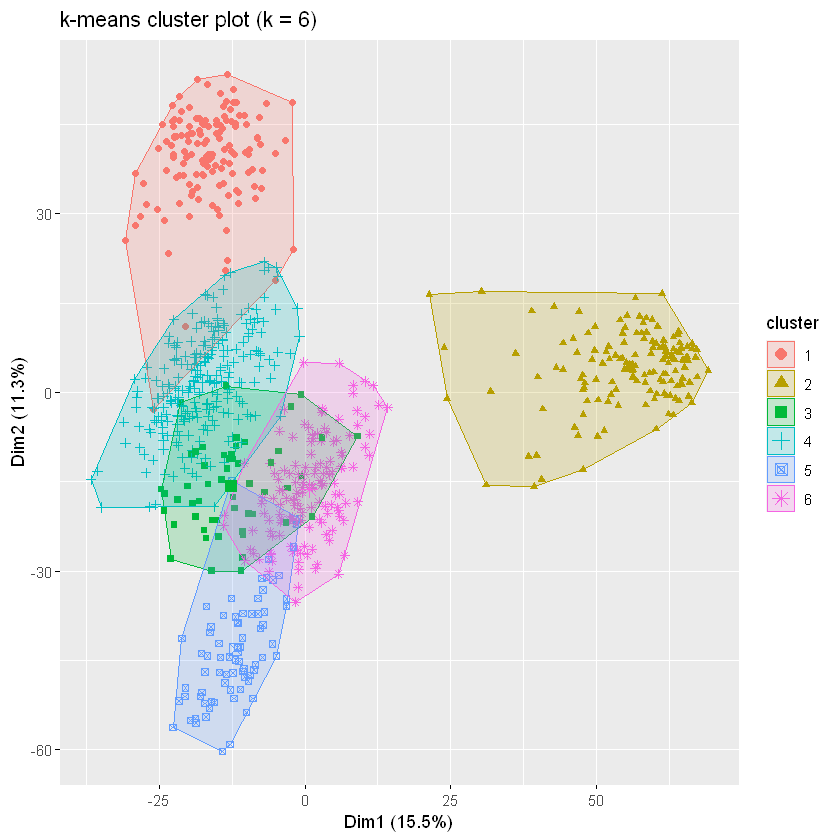

In [65]:
# Plot best clustering results using k-means method
kmeans.res.3 <- kmeans(data.5000.feat.scale, 3, nstart = 10) # But with a lot more like nstart = 25

fviz_cluster(kmeans.res.3, data.5000.feat.scale, 
            ellipse.type = "convex",
            geom = "point",
            main = "k-means cluster plot (k = 3)")

kmeans.res.4 <- kmeans(data.5000.feat.scale, 4, nstart = 10)

fviz_cluster(kmeans.res.4, data.5000.feat.scale, 
            ellipse.type = "convex",
            geom = "point",
            main = "k-means cluster plot (k = 4)")

kmeans.res.5 <- kmeans(data.5000.feat.scale, 5, nstart = 10)

fviz_cluster(kmeans.res.5, data.5000.feat.scale, 
            ellipse.type = "convex",
            geom = "point",
            main = "k-means cluster plot (k = 5)")

kmeans.res.6 <- kmeans(data.5000.feat.scale, 6, nstart = 10)

fviz_cluster(kmeans.res.6, data.5000.feat.scale, 
            ellipse.type = "convex",
            geom = "point",
            main = "k-means cluster plot (k = 6)")

In [13]:
# Cluster stablity
# Re-run the clustering a few times. Bootstrap.
pp1 <- clusterboot(data.5000.feat.scale,
                  B = 10,
                  showplots = F,
                  clustermethod = kmeansCBI,
                  krange = 5,
                  multipleboot = F,
                  count = F)
print(pp1)

pp2 <- clusterboot(data.5000.feat.scale,
                  B = 10,
                  showplots = F,
                  clustermethod = kmeansCBI,
                  krange = 6,
                  multipleboot = F,
                  count = F)
print(pp2)

* Cluster stability assessment *
Cluster method:  kmeans 
Full clustering results are given as parameter result
of the clusterboot object, which also provides further statistics
of the resampling results.
Number of resampling runs:  10 

Number of clusters found in data:  5 

 Clusterwise Jaccard bootstrap (omitting multiple points) mean:
[1] 0.8384106 0.5804981 0.5152410 0.6646115 0.7251724
dissolved:
[1] 0 1 9 0 3
recovered:
[1] 7 1 1 1 5
* Cluster stability assessment *
Cluster method:  kmeans 
Full clustering results are given as parameter result
of the clusterboot object, which also provides further statistics
of the resampling results.
Number of resampling runs:  10 

Number of clusters found in data:  6 

 Clusterwise Jaccard bootstrap (omitting multiple points) mean:
[1] 0.8253088 0.6666913 0.8552453 0.9311594 0.4410064 0.8124182
dissolved:
[1] 2 0 0 1 7 1
recovered:
[1] 7 3 7 9 3 6


#### Compare K-means clustering with True Labels

In [17]:
#install.packages("reshape2")
library('reshape2')

dat <- as.data.frame(labels[,2])

# extract pc scores for first two component and add to dat dataframe
dat$pc1 <- data.5000.pca$ind$coord[, 1] # indexing the first column
dat$pc2 <- data.5000.pca$ind$coord[, 2] # indexing the second column
dat$pc3 <- data.5000.pca$ind$coord[, 3]
dat$pc4 <- data.5000.pca$ind$coord[, 4]
dat$pc5 <- data.5000.pca$ind$coord[, 5]

pca.vars <- data.5000.pca$var$coord %>% data.frame
pca.vars$vars <- rownames(pca.vars)
pca.vars.m <- melt(pca.vars, id.vars = "vars")

#### Compare k-means klustering results to true labels

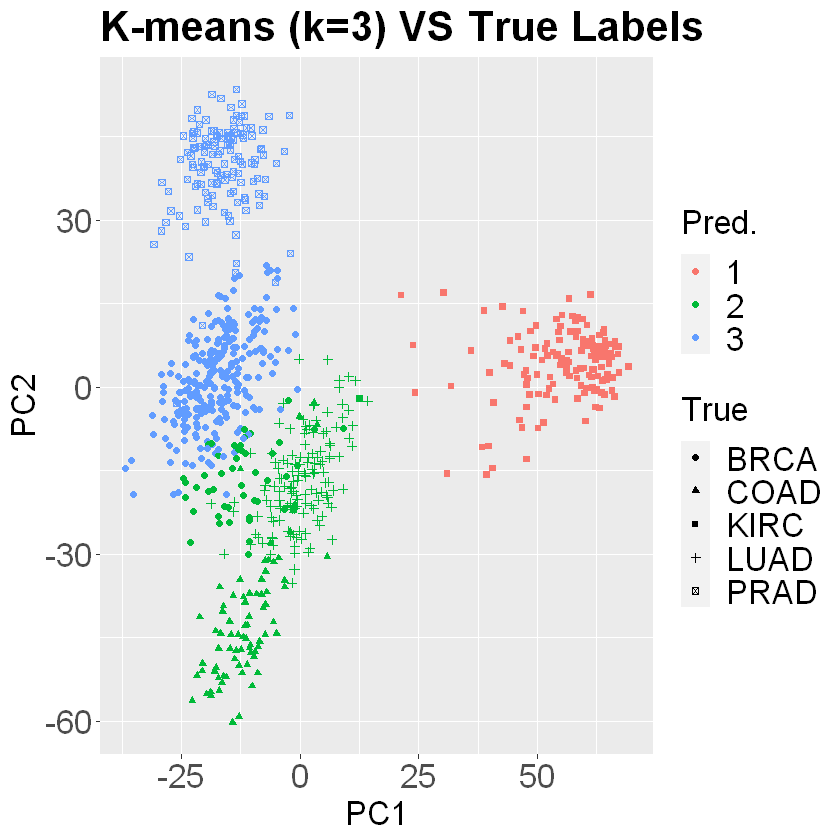

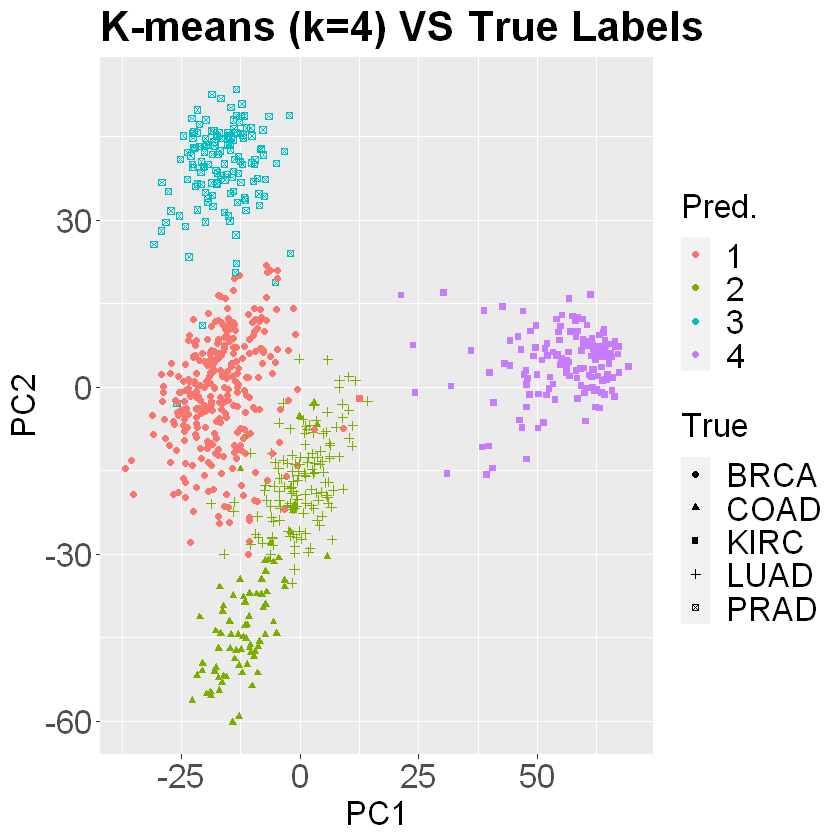

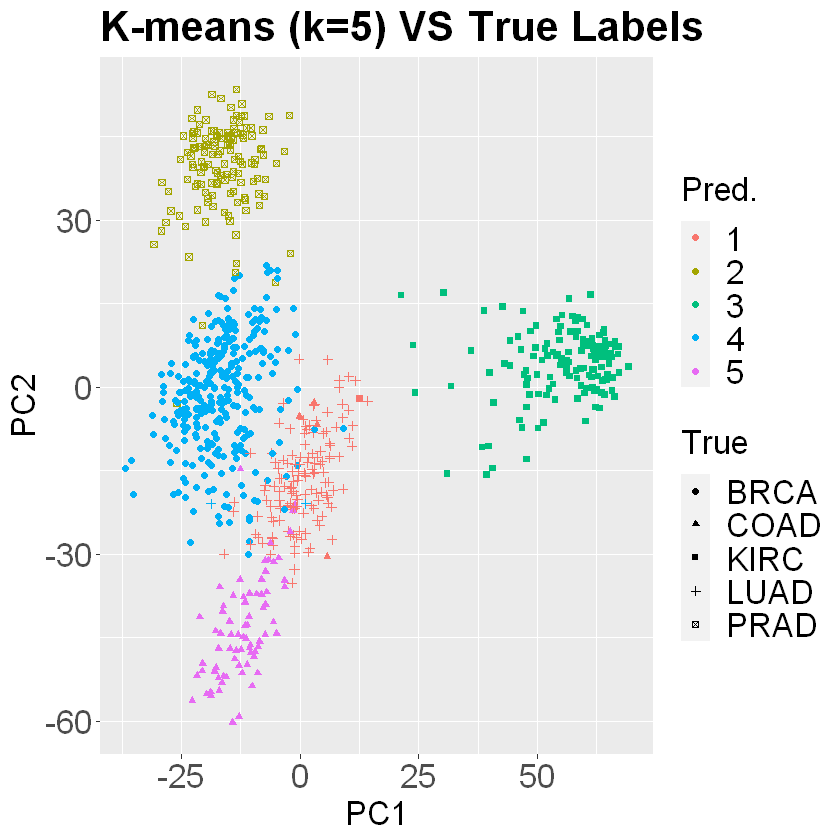

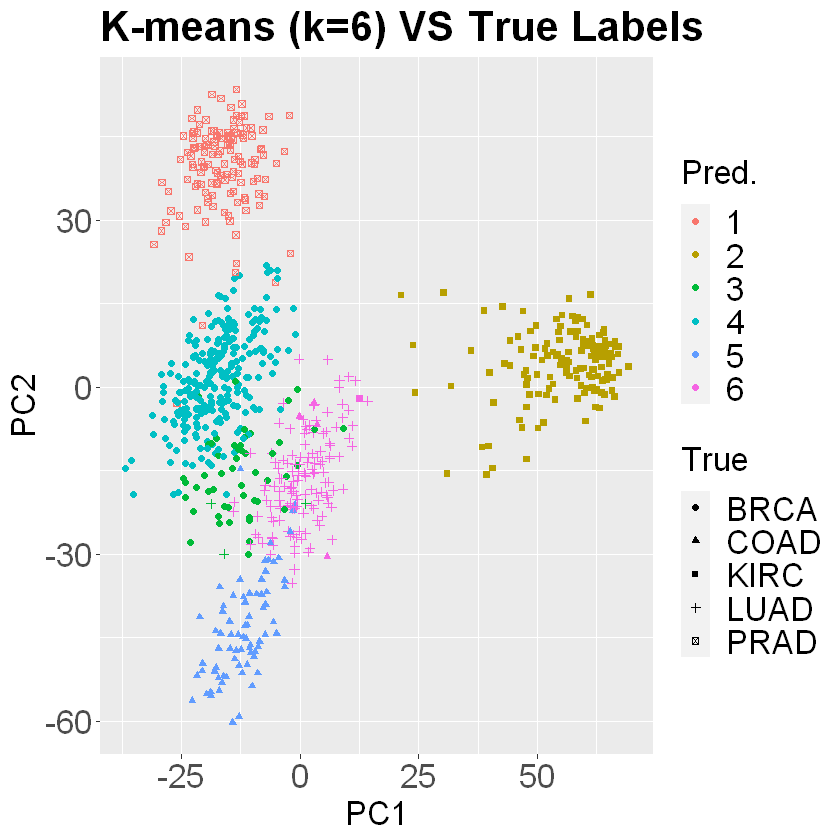

In [66]:
# k = 3
ggplot(data = dat, aes(
  x = pc1,
  y = pc2,
  color = as.factor(kmeans.res.3$cluster),
  shape = as.factor(Class))) +
  guides(color = guide_legend(title = "Pred."),
         shape = guide_legend(title = "True")) +
  geom_point(size = 1.5) +
  ggtitle("K-means (k=3) VS True Labels") +
  xlab("PC1") +
  ylab("PC2") +
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold"),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20)) 

# k = 4
ggplot(data = dat, aes(
  x = pc1,
  y = pc2,
  color = as.factor(kmeans.res.4$cluster),
  shape = as.factor(Class))) +
  guides(color = guide_legend(title = "Pred."),
         shape = guide_legend(title = "True")) +
  geom_point(size = 1.5) +
  ggtitle("K-means (k=4) VS True Labels") +
  xlab("PC1") +
  ylab("PC2") +
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold"),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20)) 

# k = 5
ggplot(data = dat, aes(
  x = pc1,
  y = pc2,
  color = as.factor(kmeans.res.5$cluster),
  shape = as.factor(Class))) +
  guides(color = guide_legend(title = "Pred."),
         shape = guide_legend(title = "True")) +
  geom_point(size = 1.5) +
  ggtitle("K-means (k=5) VS True Labels") +
  xlab("PC1") +
  ylab("PC2") +
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold"),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20)) 

# k = 6
ggplot(data = dat, aes(
  x = pc1,
  y = pc2,
  color = as.factor(kmeans.res.6$cluster),
  shape = as.factor(Class))) +
  guides(color = guide_legend(title = "Pred."),
         shape = guide_legend(title = "True")) +
  geom_point(size = 1.5) +
  ggtitle("K-means (k=6) VS True Labels") +
  xlab("PC1") +
  ylab("PC2") +
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold"),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20)) 

#### Confusion Matrix

In [35]:
# install.packages("caret")
library(caret)
# k = 5 (must have same nr. levels in data as in reference)
confusionMatrix(as.factor(as.numeric(as.factor(dat$Class))), as.factor(as.numeric(as.factor(kmeans.res.5$cluster))))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5
         1 300   0   0   0   0
         2   0   0   4   0  74
         3   0   0   1 145   0
         4   2   0 139   0   0
         5   0 136   0   0   0

Overall Statistics
                                          
               Accuracy : 0.3758          
                 95% CI : (0.3421, 0.4104)
    No Information Rate : 0.377           
    P-Value [Acc > NIR] : 0.5424          
                                          
                  Kappa : 0.1807          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.9934  0.00000 0.006944   0.0000  0.00000
Specificity            1.0000  0.88271 0.779300   0.7851  0.81293
Pos Pred Value         1.0000  0.00000 0.006849   0.0000  0.00000
Neg Pred Value         0.9960  0.81189 0.781679   0.7803  0.88872
P

### EM using GMM

In [10]:
# Fit different mixture models for 1-9 clusters
res.mclust <- Mclust(data.5000.feat.scale)
summary(res.mclust, parameters = F)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 9 components: 

 log-likelihood   n    df      BIC      ICL
       -4311271 801 50016 -8956942 -8956943

Clustering table:
  1   2   3   4   5   6   7   8   9 
135  59 137  62  59  83 109  82  75 

Here VEI stands for diagonal, varying volume, equal shape. (The BIC value is signchanged so a model with higher BIC is better)

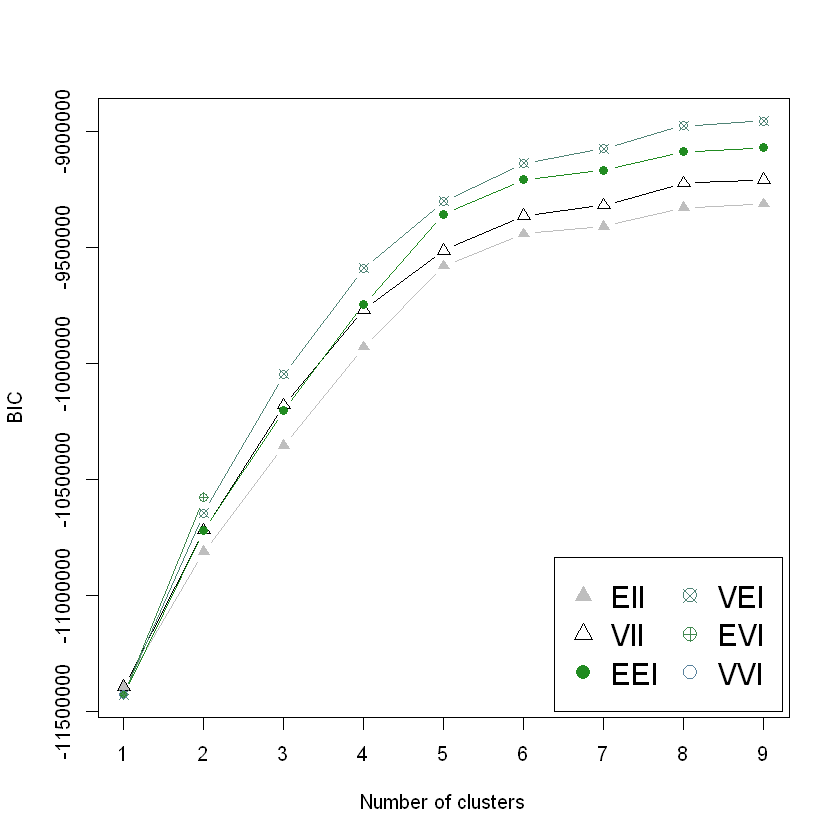

In [67]:
# Plot the BIC index for Gaussian mixture models
GMM_mclustBIC <- mclustBIC(data.5000.feat.scale)
plot(GMM_mclustBIC,
     xlab = 'Number of clusters',
     ylab = "BIC", 
     legendArgs = list(x = "bottomright", ncol = 2, cex = 1.5, inset = 0.01),
     axisArgs = list(cex = 3))


In [41]:
# Fit the best model for 5 and 6 clusters
res5.mclust <- Mclust(data.5000.feat.scale, 
                      G = 5,
                      modelNames = 'VEI')
summary(res5.mclust, parameters = F)

res6.mclust <- Mclust(data.5000.feat.scale, 
                      G = 6,
                      modelNames = 'VEI')
summary(res6.mclust, parameters = F)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 5 components: 

 log-likelihood   n    df      BIC      ICL
       -4550718 801 30008 -9302064 -9302064

Clustering table:
  1   2   3   4   5 
135 142 305 143  76 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 6 components: 

 log-likelihood   n    df      BIC      ICL
       -4452259 801 35010 -9138591 -9138591

Clustering table:
  1   2   3   4   5   6 
134 127 236 141  88  75 

In [ ]:
#res5.mclust$classification

# res5.mclust <- Mclust(data.5000.feat.scale, 
#                       G = 5,
#                      initialization = 'hcPairs')
# summary(res5.mclust, parameters = F)

# res5.mclust.boot <- MclustBootstrap(res5.mclust, 
#                 nboot = 3, 
#                 type = "bs",
#                 max.nonfit = 30)

# summary(res5.mclust.boot)

In [42]:
library(caret)
res5.mclust.confus <- confusionMatrix(as.factor(as.numeric(as.factor(dat$Class))),
                              as.factor(as.numeric(as.factor(res5.mclust$classification))))
res5.mclust.confus$table

          Reference
Prediction   1   2   3   4   5
         1   0   0 300   0   0
         2   0   2   0   0  76
         3   0   1   2 143   0
         4   0 139   2   0   0
         5 135   0   1   0   0

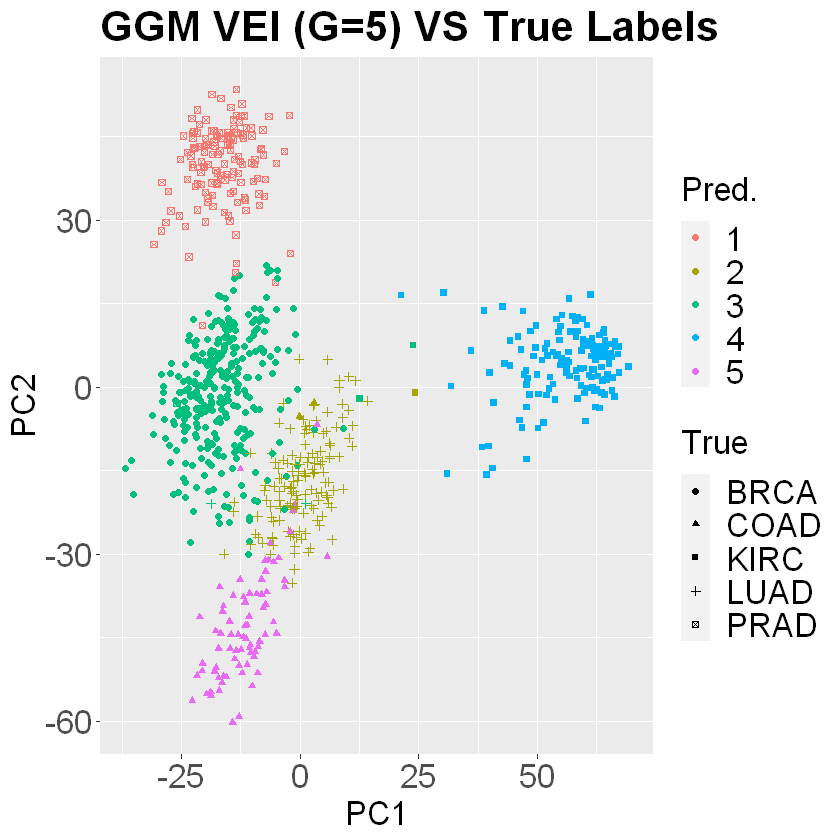

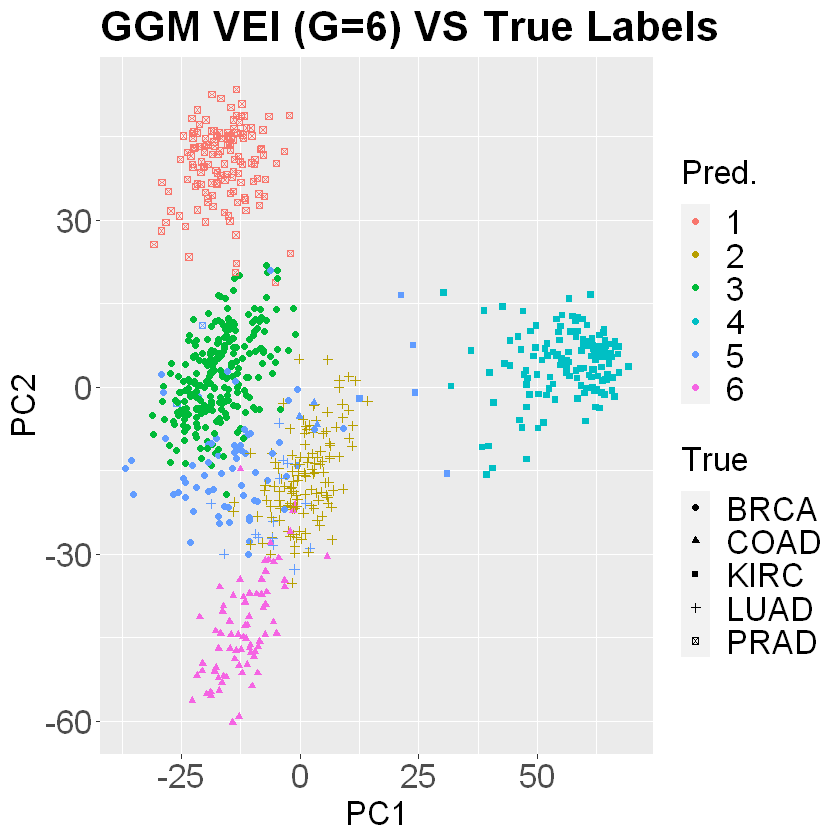

In [43]:
ggplot(data = dat, aes(
  x = pc1,
  y = pc2,
  color = as.factor(res5.mclust$classification),
  shape = as.factor(Class))) +
  guides(color = guide_legend(title = "Pred."),
         shape = guide_legend(title = "True")) +
  geom_point(size = 1.5) +
  ggtitle("GGM VEI (G=5) VS True Labels") +
  xlab("PC1") +
  ylab("PC2") +
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold"),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20)) 

ggplot(data = dat, aes(
  x = pc1,
  y = pc2,
  color = as.factor(res6.mclust$classification),
  shape = as.factor(Class))) +
  guides(color = guide_legend(title = "Pred."),
         shape = guide_legend(title = "True")) +
  geom_point(size = 1.5) +
  ggtitle("GGM VEI (G=6) VS True Labels") +
  xlab("PC1") +
  ylab("PC2") +
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
    plot.title = element_text(size = 25, face = "bold"),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20)) 

Warning message in coordProj(dat, dimens = c(2, 3), parameters = res5.mclust$parameters, :
"classification and truth differ in number of groups"


ERROR: Error in if (any(I <- (K & good))) {: missing value where TRUE/FALSE needed


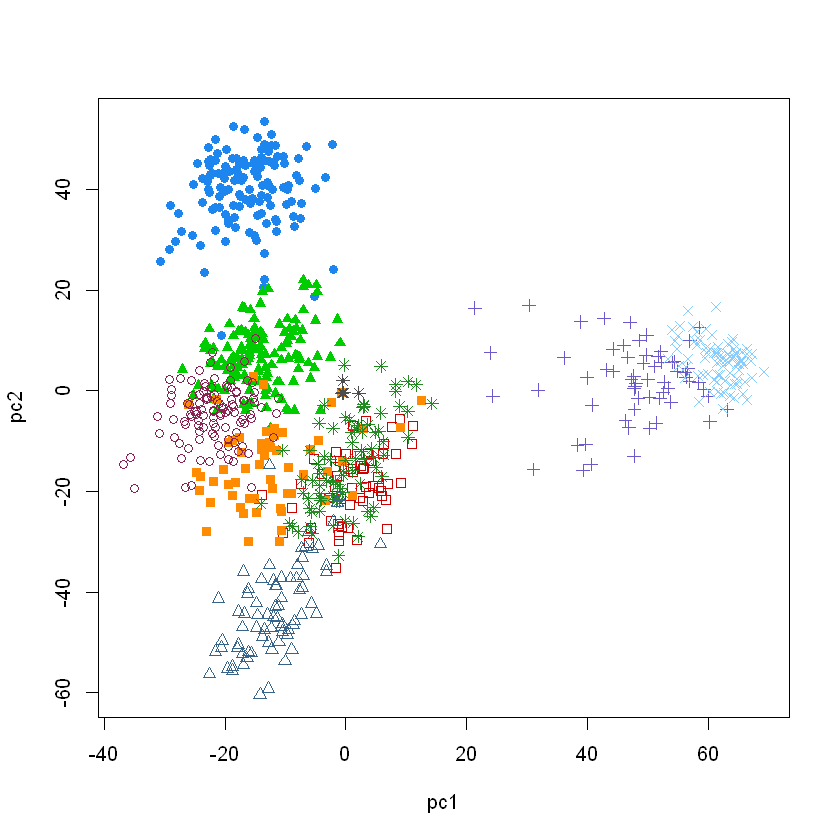

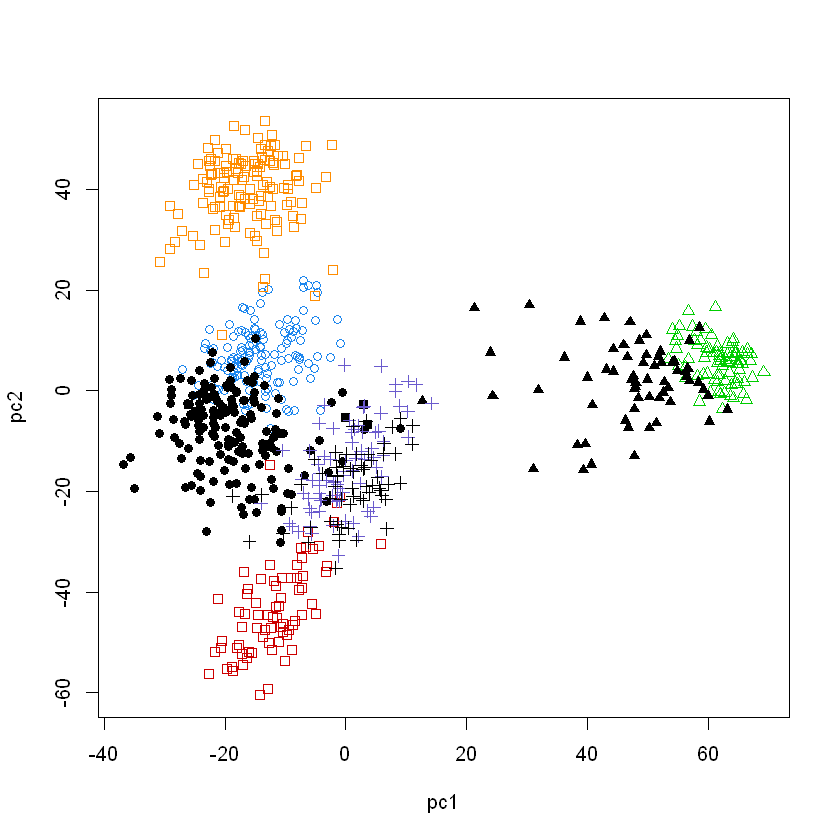

In [64]:
# res.mclust$parameters$mean
# res.mclust$z
# coordProj(res.mclust, 
#           what = c("classification", "error", "uncertainty"))

coordProj(dat, 
          dimens=c(2,3), 
          parameters = res5.mclust$parameters, 
          z = res.mclust$z,
          truth = dat$Class,
          what = "classification",
          addEllipses = TRUE, fillEllipses = mclust.options("fillEllipses"),
          main = 'GMM (G = 5) classification') 

coordProj(dat, 
          dimens=c(2,3), 
          parameters = res5.mclust$parameters, 
          z = res.mclust$z,
          truth = dat$Class,
          what = "error", 
          main = 'GMM (G = 5) Error') 

In [ ]:
#install.packages("ClusterR")
library(ClusterR)

Optimal_Clusters_GMM(
  data.5000.feat.scale,
  8,
  criterion = "BIC",
  dist_mode = "eucl_dist",
  seed_mode = "random_subset",
  km_iter = 10,
  em_iter = 5,
  verbose = FALSE,
  var_floor = 1e-10,
  plot_data = FALSE,
  seed = 1)